In [1]:
import pandas as pd
import json
import random
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import abc
from typing import List

In [3]:
train_set  = pd.read_csv('data/train.tsv', sep='\t', encoding = "ISO-8859-1")\
             .rename(columns={'Score1': 'EssayScore'})
train_set = train_set[['Id', 'EssaySet', 'EssayText', 'EssayScore']]

In [4]:
test_set_1 = pd.read_csv('data/public_leaderboard.tsv', sep='\t', encoding = "ISO-8859-1")  
test_set_2 = pd.read_csv('data/public_leaderboard_solution.csv', sep=',', encoding = "ISO-8859-1")\
             .rename(columns={'id': 'Id', 'essay_set': 'EssaySet', 'essay_score': 'EssayScore' })
test_set_2 = test_set_2[['Id', 'EssaySet', 'EssayScore']]
test_set = test_set_1.merge(test_set_2, how='left', on=['Id','EssaySet'])

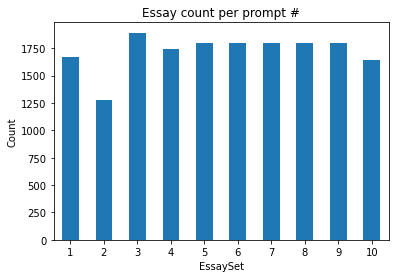

In [5]:
train_set.groupby('EssaySet').agg('count').plot.bar(y='EssayText', rot=0, legend=False)
plt.title('Essay count per prompt #')
plt.ylabel('Count')
plt.show()

<AxesSubplot:title={'center':'EssayScore'}, xlabel='EssaySet'>

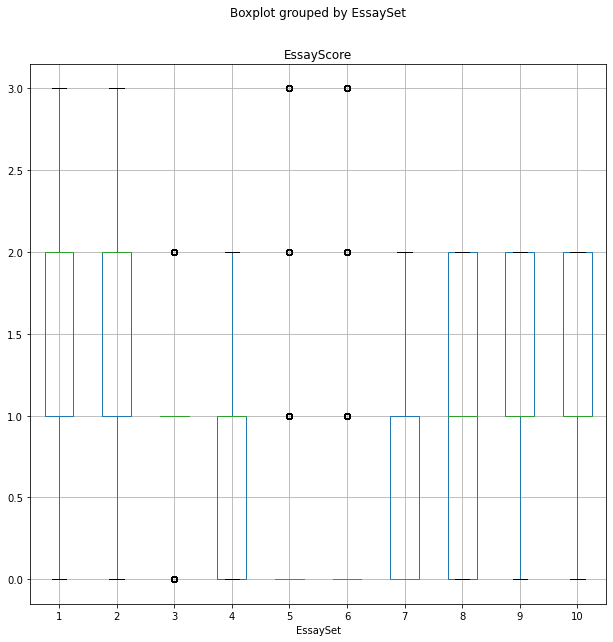

In [6]:
# Boxlot can be used to visualize the distribution of EssayScore values over each essay set.

%matplotlib inline
train_set.boxplot(column='EssayScore', by='EssaySet', figsize = (10, 10))

In [7]:
def get_train_set_per_prompt(i):
    return train_set.loc[train_set['EssaySet']==i]

In [8]:
def score_bar_plot(i):
    BIGGER_SIZE: int = 16
    plt.figure(figsize=(8,8))
    plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title=
    plt.rc('axes', labelsize=BIGGER_SIZE)     # fontsize of the x and y labels
    plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)
    sns.set_style("darkgrid")
    label_counts = (get_train_set_per_prompt(i)['EssayScore']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .rename(columns = {"index":"score distribution in prompt" + str(i)})
                     )
    p = sns.barplot(x="score distribution in prompt" + str(i), y="percentage", data=label_counts)

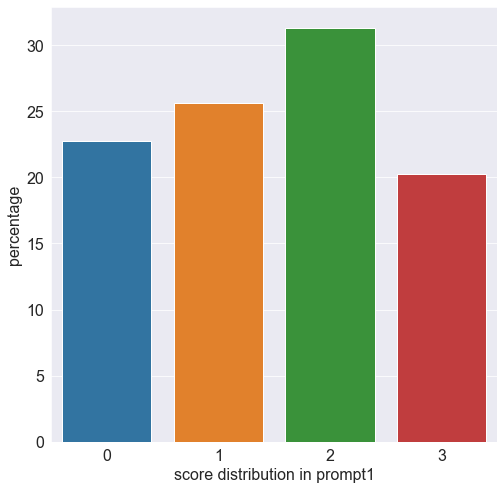

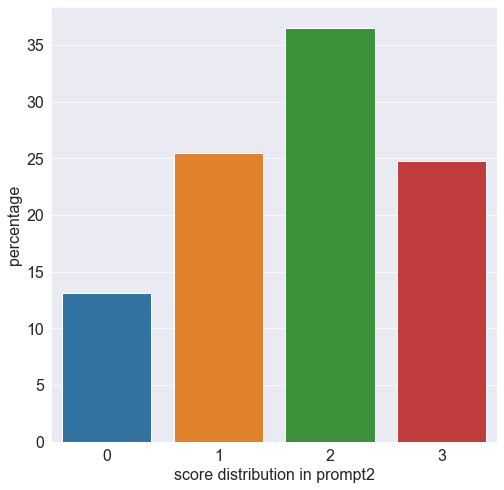

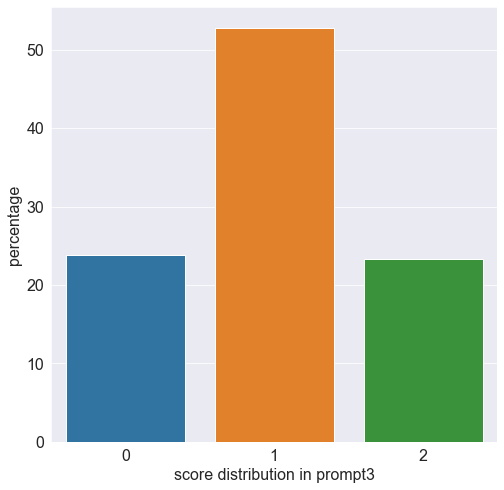

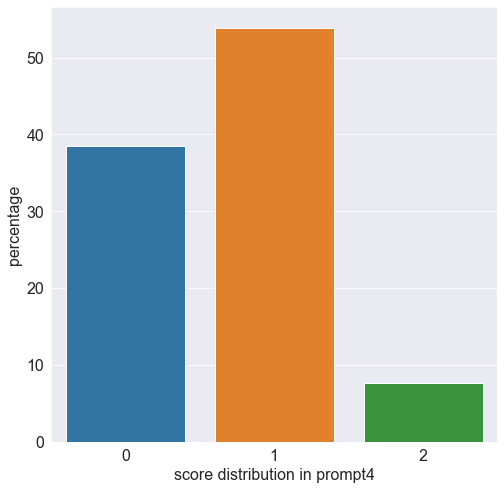

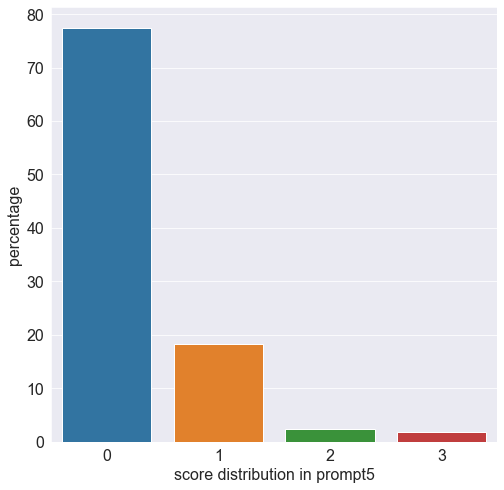

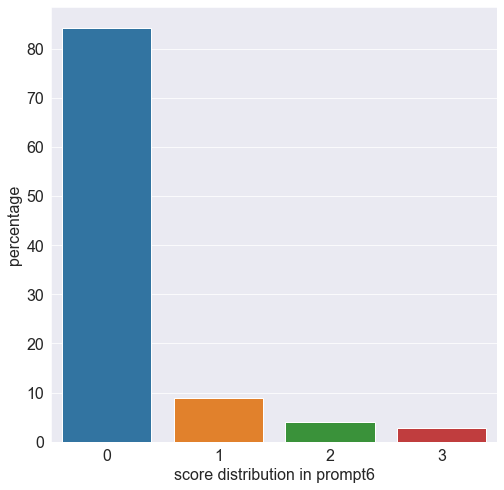

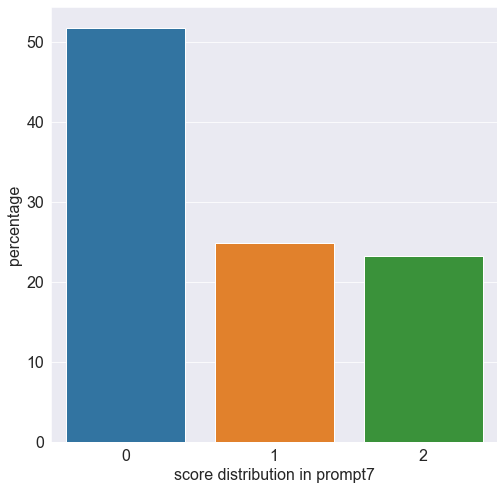

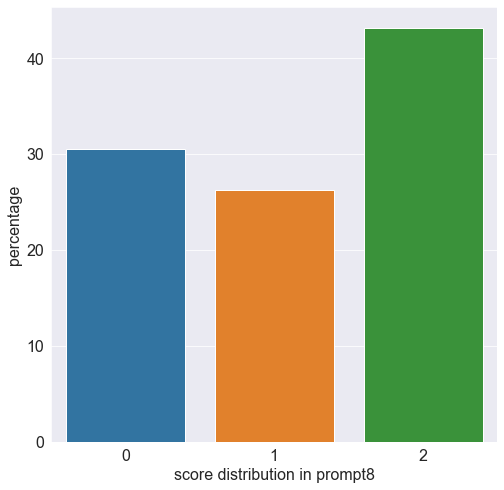

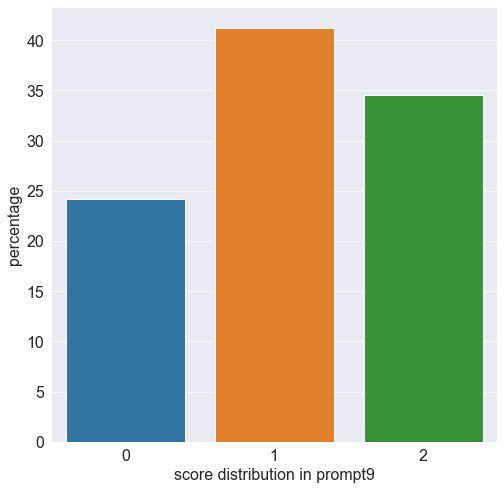

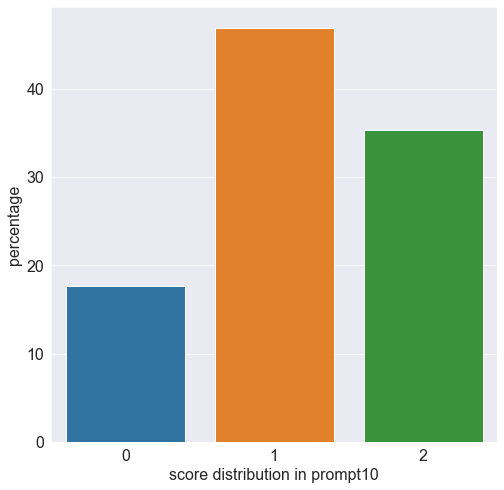

In [9]:
for i in range(10):
    score_bar_plot(i+1)

In [11]:
# from ipynb.fs.full.utils import extract_features, get_tfidf_vectors

In [14]:
# extracting features from essay set 5

# features_set5 = extract_features(get_train_set_per_prompt(5))
# features_set5.to_csv('data/features_set5.csv', index=False)
# features_set5 = pd.read_csv('data/features_set5.csv')
# features_set5.sample(5)

In [15]:
def get_tfidf_vectors(essays):
    vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_df=0.9，max_features=400, stop_words="english")
    
    tfidf_vectors = vectorizer.fit_transform(essays)
    
    return pd.DataFrame(tfidf_vectors.toarray(), columns=vectorizer.get_feature_names())

In [16]:
tfidf = get_tfidf_vectors(get_train_set_per_prompt(5)['EssayText'])
tfidf

,acid,acid amino,acid chain,acid sequence,acid sequence protein,acids,acids amino,acids amino acids,acids form,acids make,...,trna trna,turn,turned,turns,use,used,uses,using,way,work
0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.254107,0.0,0.311172,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
4,0.142646,0.0,0.0,0.0,0.0,0.130833,0.0,0.0,0.249516,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1790,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
1791,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
1792,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
1793,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0


In [ ]:
# # feature set
# feature_cols = ['avg_word_len', 'lemma_count']

# features = pd.concat([features_set5[feature_cols], tfidf], axis=1)

In [ ]:
# len(features.columns)

In [ ]:
# Exploratory Data Analysis (EDA) on the data

# %matplotlib inline
# features_set5.plot.scatter(x = 'char_count', y = 'EssayScore', s=10)
# features_set5.plot.scatter(x = 'word_count', y = 'EssayScore', s=10)
# features_set5.plot.scatter(x = 'sent_count', y = 'EssayScore', s=10)
# features_set5.plot.scatter(x = 'avg_word_len', y = 'EssayScore', s=10)
# features_set5.plot.scatter(x = 'lemma_count', y = 'EssayScore', s=10)
# features_set5.plot.scatter(x = 'spell_err_count', y = 'EssayScore', s=10)
# features_set5.plot.scatter(x = 'noun_count', y = 'EssayScore', s=10)
# features_set5.plot.scatter(x = 'adj_count', y = 'EssayScore', s=10)
# features_set5.plot.scatter(x = 'verb_count', y = 'EssayScore', s=10)
# features_set5.plot.scatter(x = 'adv_count', y = 'EssayScore', s=10)

# Essay Set 5 Trends:

# By plotting the below scatter plots, we can examine how different features above affect the grade the student receives.
# to do
# 1. I observed that there is a strong correlation between average word length of an essay and the final essay score. 
#    I observed similar correlations for character count and noun_count of an essay but weaker.
#    These features indicate language fluency and dexterity.
# 2. Various parts-of-speech such as nouns, adjectives adverbs and verbs are good proxies to test vocabulary. 
#    This feature can also be taken as a rudimentary proxy for diction.
#    I observed a weaker correlation between noun_count and the final essay score. 
#    Similar trends with lemma count,verb count and spell error count.

In [17]:
def get_test_set_per_prompt(i):
    return test_set.loc[test_set['EssaySet']==i]

In [18]:
def get_seed_set_per_prompt(i):
    seed_set = get_train_set_per_prompt(i).sample(10, random_state=42)
    seed_set.reset_index(drop=True, inplace=True)
    return seed_set 

In [19]:
def select_representative_seed_set(i):
    # Random selection per group/score
    df = get_train_set_per_prompt(i)
    seed_set = df.groupby('EssayScore').apply(pd.DataFrame.sample, n=1)
    seed_set.reset_index(drop=True, inplace=True)
    return seed_set 

In [20]:
def get_pool_set(i):
    train_set = get_train_set_per_prompt(i)
    seed_set = get_seed_set_per_prompt(i)
    pool_set = train_set[~train_set.index.isin(seed_set.index)]
    pool_set.reset_index(drop=True, inplace=True)
    return pool_set

In [21]:
class QueryStrategy(abc.ABC):
    @abc.abstractmethod
    def selection(self, *args, **kwargs):
        raise NotImplementedError

In [22]:
class RandomSelection(QueryStrategy):
    """
    Random selection strategy.

    Parameters:
    pool_samples: int - number of data samples in unlabelled pool
    batch_size: int - number of samples which we want to select

    Returns:
    List[int]: List of data samples indexes which will be selected.
    """
    def selection(self, pool_samples: np.ndarray, batch_size: int) -> List[int]:
        if len(pool_samples) >= batch_size:
            selection = np.random.choice(len(pool_samples), batch_size, replace=False)
        else:
            selection = np.arange(len(pool_samples))
        return selection

In [23]:
class MarginSelection(QueryStrategy):
    """
    Margin selection strategy.

    Parameters:
    predicted_probs: np.ndarray - predicted probabilities of the unlabelled pool
    batch_size: int - number of samples which we want to select

    Returns:
    List[int]: List of data samples indexes which will be selected.
    """
    def selection(self, predicted_probs: np.ndarray, batch_size:int) -> List[int]:
        
        # sort sample's predicted probability in unlabelled pool from biggest to smallest
        #[::-1] end to beginning, count down by 1 
        sorted = np.sort(predicted_probs, axis=1)[:, ::-1]
        
        # calculate difference between 2 max probabilities, the two most confident predictions
        margin = sorted[:, 0] - sorted[:, 1]
        
        if len(predicted_probs) >= batch_size:
            # Take the samples(index) with smallest values, which means the least confident one.
            selection = np.argsort(margin)[:batch_size]
        else:
            selection = np.argsort(margin)
        return selection

In [ ]:
from typing import Callable, Any
import inspect

class ActiveLearner:
    def __init__(self, test: pd.DataFrame, initial_train:pd.DataFrame, pool:pd.DataFrame, classifier, batch_size: int = 10):
        
        # constant batch_size: 10
        self.batch_size: int = batch_size
            
        # test set    
        self.test: pd.DataFrame = test
            
        # train set
        self.train: pd.DataFrame = initial_train.copy() 
        
        # unlabeled pool
        self.pool: pd.DataFrame = pool.copy()
        
        # classifier
        self.classifier = classifier
        
        # fitting the classifier on initial train set
#         X_train = get_tfidf_vectors(self.train['EssayText'])
#         y_train = self.train["EssayScore"]
#         self.classifier.fit(X_train, y_train)
        self.classifier.fit(self.train["EssayText"], self.train["EssayScore"])
        
        
        # define a list where we will put metrics from every iteration
        self.calculated_metrics: List[float] = list()
            
        # store the metrics on 0 iteration
        self.calculated_metrics.append(accuracy_score(self.test["EssayScore"],
                                                self.classifier.predict(self.test["EssayText"])))
        

    def active_learning_cycle(self, iterations_num: int , selection_type: Any):
        
        for it in range(iterations_num):
                # make predictions on unlabelled pool
                probs = self.classifier.predict_proba(self.pool["EssayText"]) 

                # get the indexes of data samples with query strategy
                args: List[str] = inspect.getfullargspec(selection_type.selection)[0]
                if len(args)==3:
                    indexes = selection_type.selection(probs, self.batch_size) 
                elif embedder:
                    indexes = selection_type.selection(embedder, self.batch_size, self.train, self.pool)
                else:
                    indexes = selection_type.selection(probs, self.batch_size, self.train, self.classifier)

                # select data samples by indexes from pool    
                new = self.pool[self.pool.index.isin(indexes)] 

                # as we already have labels, append labelled sample to train data
                self.train = pd.concat([self.train, new]) 
                # reset indexing
                self.train.reset_index(drop=True, inplace=True)

                 # drop selected samples from ublabeled pool
                self.pool.drop(indexes, inplace=True)
                # reset indexing
                self.pool.reset_index(drop=True, inplace=True) 

                # fit the classifier on updated train set
                self.classifier.fit(self.train["EssayText"], self.train["EssayScore"])

                # do the predictions on the test set
                preds = self.classifier.predict(self.test["EssayText"])
                
                self.calculated_metrics.append(accuracy_score(self.test["EssayScore"], preds))


In [ ]:
def get_avg_calculated_metrics(i, selection_type, round):
    
    total_calculated_metrics = []
    
    for r in range(round):
        test_set = get_test_set_per_prompt(i)
        seed_set = get_seed_set_per_prompt(i)
        pool_set = get_pool_set(i)

        cycle = ActiveLearner(test_set, seed_set, pool_set, classifier)
        cycle.active_learning_cycle(iterations_num = iterations_num,
                                       selection_type = selection_type)
        total_calculated_metrics.append(cycle.calculated_metrics)
        
    avg_calculated_metrics = np.average(total_calculated_metrics, axis=0)
    
    return avg_calculated_metrics


In [ ]:
# calculate possible amount of iterations with given batch_size
pool_prompt_5 = get_pool_set(5)
iterations_num = int(pool_prompt_5.shape[0]/10)

# specify the classifier
classifier = Pipeline( 
    steps=[
        ("tfidf", TfidfVectorizer()),
#         ('clf', LogisticRegression(random_state=42)),
#           ('clf', KNeighborsClassifier(n_neighbors=4),
        ('clf', RandomForestClassifier(random_state=42)
      )])

In [ ]:
avg_random_cycle_calculated_metrics = get_avg_calculated_metrics(5, RandomSelection(), 10)
avg_margin_cycle_calculated_metrics = get_avg_calculated_metrics(5, MarginSelection(), 10)

In [ ]:
# result plot for prompt
import matplotlib.pyplot as plt

BIGGER_SIZE: int = 16
plt.figure(figsize=(15,8))
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title=
plt.rc('axes', labelsize=BIGGER_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)

In [ ]:
iterations = np.arange(0, iterations_num+1, 1)

plt.title ("Accuracy score on test dataset by iteration for Prompt_5", fontsize=BIGGER_SIZE)
plt.ylabel("Test Accuracy score", fontsize=BIGGER_SIZE)
plt.ylim(0.7,1.1)
plt.xlim(-1,iterations_num+10)
plt.xticks(np.arange(0, iterations_num+1, 10))
plt.yticks(np.arange(0.7, 1.1, 0.2))
plt.xlabel("Iteration number (10  data samples per iterations)")

plt.plot(iterations, avg_random_cycle_calculated_metrics, label = "Random selection", marker='s', markevery=10)
plt.plot(iterations, avg_margin_cycle_calculated_metrics, label = "Margin selection", marker='s', markevery=10)
plt.legend()
plt.show()